In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
df = pd.read_csv('dataset/datatweet.csv')
df.head(10)

,sentiment,STEMMED,label_encoder
0,-1,ketawa jelek banget,negatif
1,1,request foto ktp pakai filter ig muka deket ba...,netral
2,1,nyoba pake kamera analog hasil jelek sebel sus...,netral
3,-1,nickname jelek anjing,negatif
4,1,jelek,netral
5,-1,emang udah jelek jelek pake banget banget kali,negatif
6,1,sayang banget provider tri sinyal jelek banget...,netral
7,1,halo tolong timeline hpku cemplung wc speakern...,netral
8,1,cewe samain ikan aja disamain sam kucing gapun...,netral
9,-1,jelek bangett,negatif


In [35]:
df.describe

<bound method NDFrame.describe of      sentiment                                            STEMMED  \
0           -1                                ketawa jelek banget   
1            1  request foto ktp pakai filter ig muka deket ba...   
2            1  nyoba pake kamera analog hasil jelek sebel sus...   
3           -1                              nickname jelek anjing   
4            1                                              jelek   
..         ...                                                ...   
836          1                                    suka aneh aneeh   
837          1                       pikir aneh baik pawang hujan   
838          1        kalo rini suka aneh suka kadang kayak nenek   
839          1                               otak emang suka aneh   
840          1  aneh cewek rela jual alesan nya bayar kuliah k...   

    label_encoder  
0         negatif  
1          netral  
2          netral  
3         negatif  
4          netral  
..            ...

In [3]:
df.dtypes

sentiment         int64
STEMMED          object
label_encoder    object
dtype: object

In [4]:
# Definisi X dan y
X = df['STEMMED']
y = df['label_encoder']

## pembobotan kata

In [5]:
# TF IDF Vectorizer


vect = TfidfVectorizer(binary=True)
X_tf = vect.fit_transform(X)

print("IF-IDF", type(X_tf), X_tf.shape)


IF-IDF <class 'scipy.sparse._csr.csr_matrix'> (841, 2241)


In [6]:
X_tf

<841x2241 sparse matrix of type '<class 'numpy.float64'>'
	with 5077 stored elements in Compressed Sparse Row format>

In [7]:
#menampilkan jumlah kata yang term
print(len(vect.vocabulary_))

2241


In [8]:
(vect.vocabulary_)

{'ketawa': 998,
 'jelek': 880,
 'banget': 187,
 'request': 1708,
 'foto': 601,
 'ktp': 1054,
 'pakai': 1532,
 'filter': 590,
 'ig': 796,
 'muka': 1314,
 'deket': 454,
 'kamera': 939,
 'njir': 1435,
 'nyoba': 1475,
 'pake': 1533,
 'analog': 88,
 'hasil': 740,
 'sebel': 1785,
 'susah': 1952,
 'yak': 2219,
 'nickname': 1426,
 'anjing': 108,
 'emang': 548,
 'udah': 2130,
 'kali': 930,
 'sayang': 1774,
 'provider': 1650,
 'tri': 2087,
 'sinyal': 1865,
 'suka': 1941,
 'trouble': 2092,
 'marah': 1210,
 'halo': 718,
 'tolong': 2078,
 'timeline': 2058,
 'hpku': 776,
 'cemplung': 371,
 'wc': 2195,
 'speakernya': 1905,
 'gimana': 680,
 'cewe': 378,
 'samain': 1754,
 'ikan': 800,
 'aja': 34,
 'disamain': 491,
 'sam': 1751,
 'kucing': 1059,
 'gapunya': 640,
 'akal': 42,
 'analogi': 89,
 'bangett': 188,
 'iya': 843,
 'bodo': 305,
 'cek': 365,
 'komen': 1027,
 'ava': 143,
 'ngambek': 1375,
 'uridu': 2155,
 'umur': 2141,
 'hidup': 761,
 'dasar': 440,
 'handsfree': 725,
 'turut': 2112,
 'mahal': 1175,


## Splitting Data 80:20

In [9]:
# Train Test Split 
X_train,X_test,y_train,y_test = train_test_split(X_tf.toarray(),y,random_state=3,test_size=0.2)



In [10]:
y_train.shape
df.to_csv('dataset/y_train.csv', index=False)

In [11]:
y_test
df.to_csv('dataset/y_testing.csv', index=False)

## NAIVE BAYES CLASSIFIER

In [12]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
predict_NB = nb.predict(X_test)


In [13]:
print(accuracy_score(y_test, predict_NB))

0.6923076923076923


In [14]:
y_test.shape

(169,)

## Perbandingan Karnel Naive Bayes

              precision    recall  f1-score   support

     negatif       0.65      0.45      0.54        66
      netral       0.71      0.84      0.77       103

    accuracy                           0.69       169
   macro avg       0.68      0.65      0.65       169
weighted avg       0.69      0.69      0.68       169



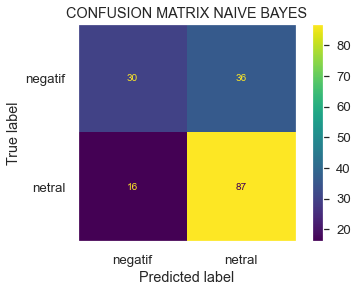

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, predict_NB))

ConfusionMatrixDisplay.from_predictions(y_test, predict_NB)
plt.title("CONFUSION MATRIX NAIVE BAYES")
plt.grid(False)
plt.show()

In [16]:
from io import StringIO
classification = classification_report(y_test, predict_NB)
s = StringIO(classification)
with open ('dataset/classification_NB.csv', 'w') as f:
    for line in s:
        f.write(line)

## SUPPORT VECTOR MACHINE

In [17]:
#pengujian karnel RBF
from sklearn.svm import SVC
model = SVC(kernel='rbf', max_iter=1000, C=1000)
model.fit(X_train, y_train)
predict_rbf = model.predict(X_test)
print(accuracy_score(y_test, predict_rbf))

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.7159763313609467


In [18]:
#pengujian karnel Polynomial
from sklearn.svm import SVC
model = SVC(kernel='poly', max_iter=1000, C=1000)
model.fit(X_train, y_train)
predict_poly = model.predict(X_test)
print(accuracy_score(y_test, predict_poly))

0.6745562130177515


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [19]:
#pengujian karnel Linear
from sklearn.svm import SVC
model = SVC(kernel='linear', max_iter=1000, C=1000)
model.fit(X_train, y_train)
predict_SVM = model.predict(X_test)

print(accuracy_score(y_test, predict_SVM))

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.6982248520710059


## perbandingan Karnel

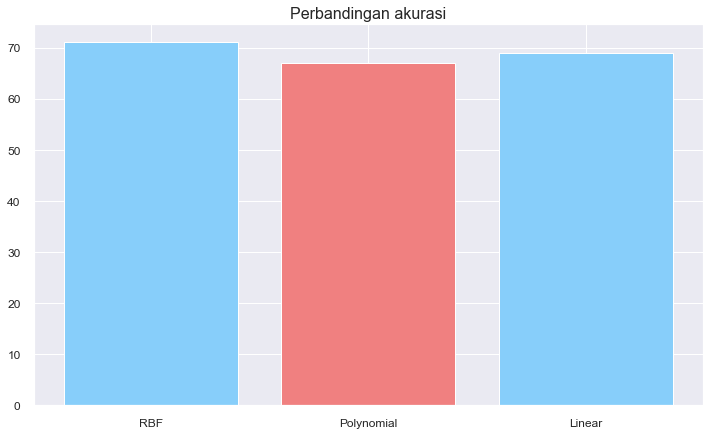

In [33]:
x = ['RBF', 'Polynomial','Linear']
akurasi = [71, 67,69]
colors =['lightskyblue', 'lightcoral']

plt.figure(figsize=(12,7))
plt.bar(x, akurasi, color=colors) 

plt.title('Perbandingan akurasi', size=16)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

## Confusion Matriks SVM

              precision    recall  f1-score   support

     negatif       0.70      0.47      0.56        66
      netral       0.72      0.87      0.79       103

    accuracy                           0.72       169
   macro avg       0.71      0.67      0.68       169
weighted avg       0.71      0.72      0.70       169



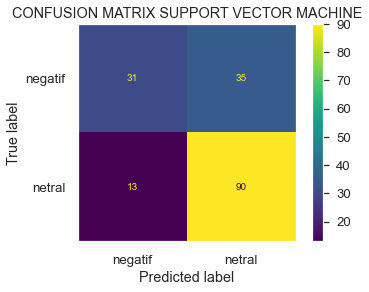

In [21]:
#accuracy, precision recall F1-score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, predict_rbf))

ConfusionMatrixDisplay.from_predictions(y_test, predict_rbf)
plt.title("CONFUSION MATRIX SUPPORT VECTOR MACHINE")
plt.grid(False)
plt.show()

In [22]:
from io import StringIO
classification = classification_report(y_test, predict_rbf)
s = StringIO(classification)
with open ('dataset/classification_SVM.csv', 'w') as f:
    for line in s:
        f.write(line)

# VISUALIASI

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diagram Bar Data Analisis Sentimen')

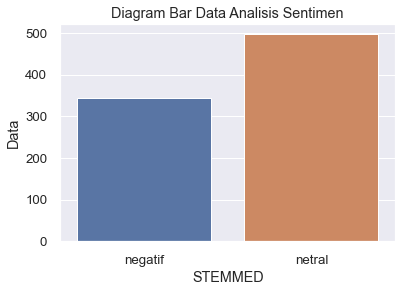

In [23]:
#melihat perbandingan sentimen netral dan negatif

sns.countplot(df["label_encoder"])
plt.xlabel('STEMMED')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen')

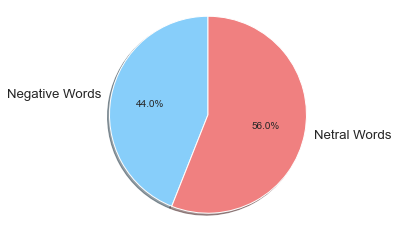

In [24]:
labels = ['Negative Words', 'Netral Words']
qu = [44,56]
colors =['lightskyblue', 'lightcoral']
plt.pie(qu, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()



C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diagram Bar Data Analisis Sentimen y training')

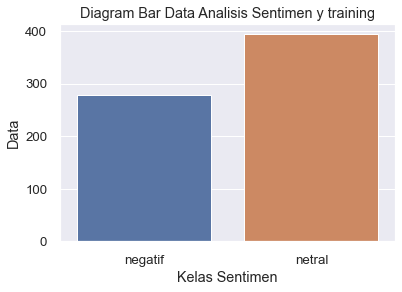

In [25]:
#bar plot untuk data training

sns.countplot(y_train)
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen y training')

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diagram Bar Data Analisis Sentimen untuk y testing')

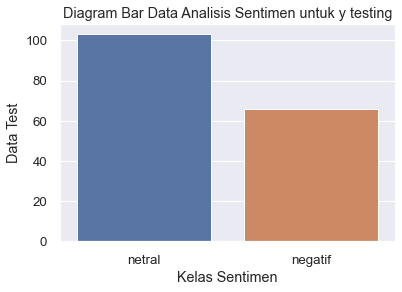

In [26]:
#bar plot untuk data test

sns.countplot(y_test)
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data Test')
plt.title('Diagram Bar Data Analisis Sentimen untuk y testing')

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Diagram Bar Data Analisis Sentimen Naive Bayes')

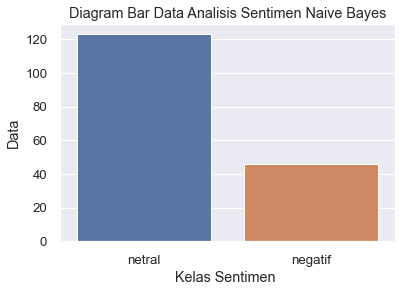

In [27]:
#Bar Plot untuk klasifikasi NB

sns.countplot(predict_NB)
plt.xlabel('Kelas Sentimen ')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen Naive Bayes')

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


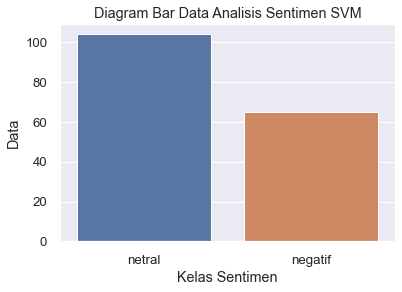

In [28]:
#Bar Plot untuk klasifikasi SVM

CategorySVM = predict_SVM
sns.countplot(CategorySVM)
plt.xlabel('Kelas Sentimen')
plt.ylabel('Data')
plt.title('Diagram Bar Data Analisis Sentimen SVM')
plt.savefig("bar_svm.png")